In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
heartDisease_Dataset = pd.read_csv('/content/Heart Disease.csv')

In [81]:
heartDisease_Dataset.shape

(4238, 16)

In [3]:
heartDisease_Dataset.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,HeartDisease
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
heartDisease_Dataset.shape

(4238, 16)

In [5]:
heartDisease_Dataset.rename(columns={'male': 'gender'}, inplace=True)

In [6]:
heartDisease_Dataset.head()

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,HeartDisease
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


Printing Correlation Matrix to check the importance of the feature to dep them or not.

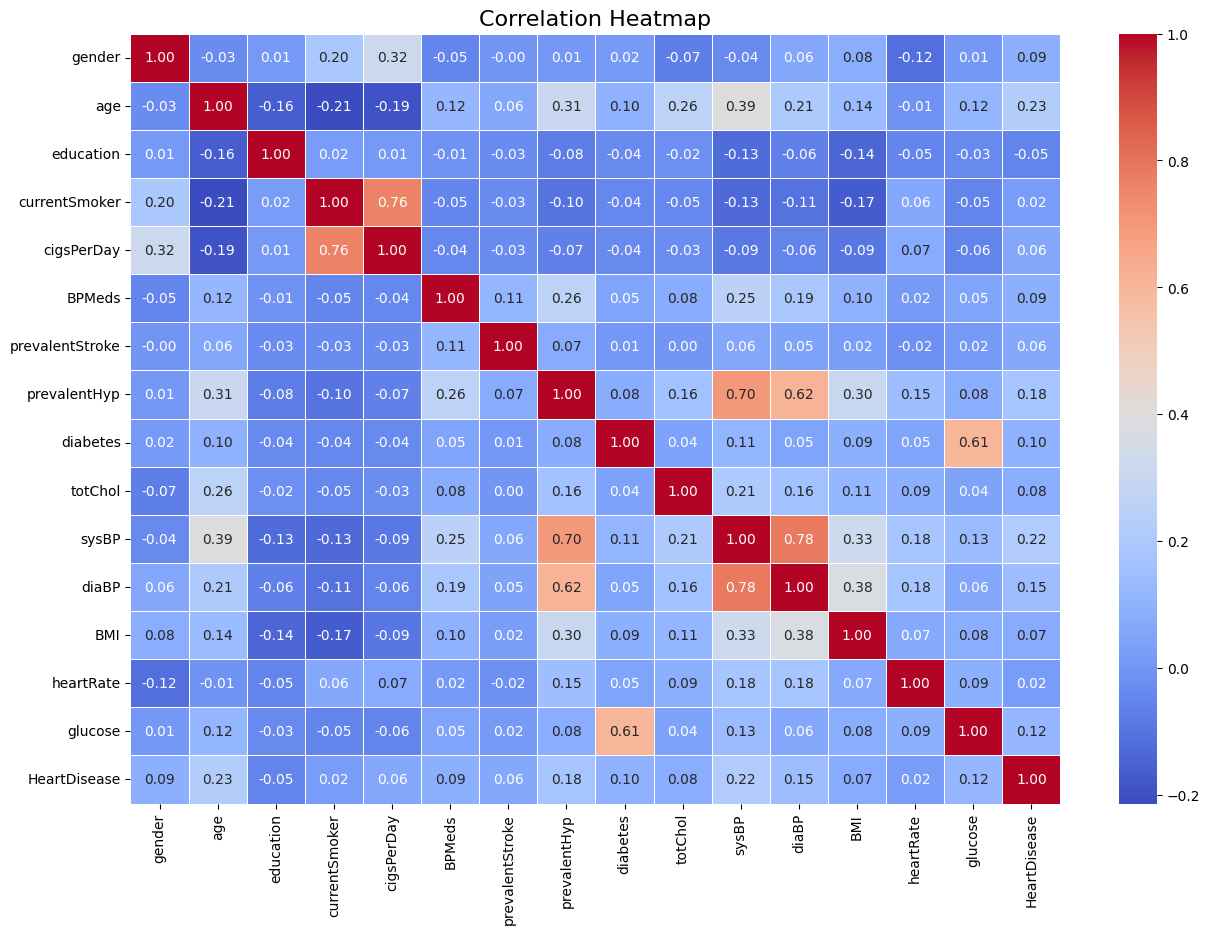

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = heartDisease_Dataset.corr()

# Set the figure size to make the heatmap more readable
plt.figure(figsize=(15, 10))  # Adjust the width and height as needed

# Create a heatmap with annotations and a color map
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Add a title
plt.title("Correlation Heatmap", fontsize=16)

# Show the plot
plt.show()


CLEANING THE DATA

using mean, median or mode according to the data distribution to fill the nan values.

In [7]:
heartDisease_Dataset.isnull().sum()

,0
gender,0
age,0
education,105
currentSmoker,0
cigsPerDay,29
BPMeds,53
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,50


<ipython-input-9-912b06027bdc>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(heartDisease_Dataset.education)


<Axes: xlabel='education', ylabel='Density'>

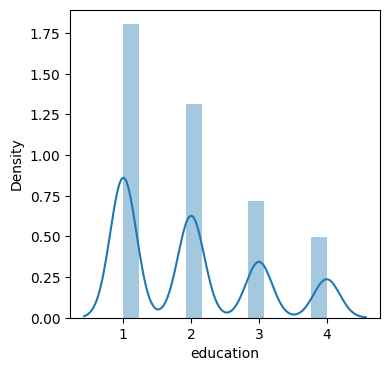

In [9]:
fig, ax = plt.subplots(figsize=(4,4))
sns.distplot(heartDisease_Dataset.education)

In [10]:
mode_value = heartDisease_Dataset['education'].mode()[0]

# Fill the NaN values with the mode
heartDisease_Dataset['education'].fillna(mode_value, inplace=True)

# Check for any remaining NaN values
print(heartDisease_Dataset.isnull().sum())

gender               0
age                  0
education            0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
HeartDisease         0
dtype: int64


In [11]:
heartDisease_Dataset.isnull().sum()

,0
gender,0
age,0
education,0
currentSmoker,0
cigsPerDay,29
BPMeds,53
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,50


<ipython-input-12-c58e78f41fb3>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(heartDisease_Dataset.cigsPerDay)


<Axes: xlabel='cigsPerDay', ylabel='Density'>

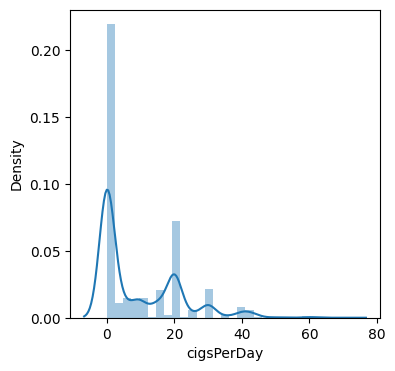

In [12]:
fig, ax = plt.subplots(figsize=(4,4))
sns.distplot(heartDisease_Dataset.cigsPerDay)

In [13]:
heartDisease_Dataset['cigsPerDay'].fillna(heartDisease_Dataset['cigsPerDay'].median(),inplace=True)

In [14]:
heartDisease_Dataset.isnull().sum()

,0
gender,0
age,0
education,0
currentSmoker,0
cigsPerDay,0
BPMeds,53
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,50


<ipython-input-15-b3b693ee2618>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(heartDisease_Dataset.BPMeds)


<Axes: xlabel='BPMeds', ylabel='Density'>

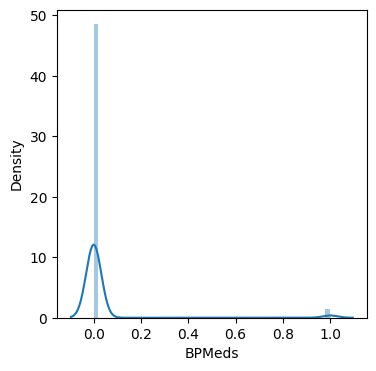

In [15]:
fig, ax = plt.subplots(figsize=(4,4))
sns.distplot(heartDisease_Dataset.BPMeds)

In [16]:
mode_value = heartDisease_Dataset['BPMeds'].mode()[0]

# Fill the NaN values with the mode
heartDisease_Dataset['BPMeds'].fillna(mode_value, inplace=True)

In [17]:
heartDisease_Dataset.isnull().sum()

,0
gender,0
age,0
education,0
currentSmoker,0
cigsPerDay,0
BPMeds,0
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,50


<ipython-input-18-e9a43ba4744a>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(heartDisease_Dataset.totChol)


<Axes: xlabel='totChol', ylabel='Density'>

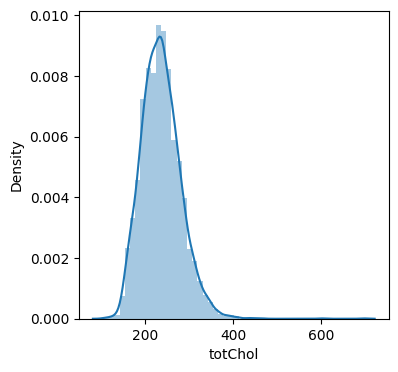

In [18]:
fig, ax = plt.subplots(figsize=(4,4))
sns.distplot(heartDisease_Dataset.totChol)

In [19]:
heartDisease_Dataset['totChol'].fillna(heartDisease_Dataset['totChol'].mean(),inplace=True)

In [20]:
heartDisease_Dataset.isnull().sum()

,0
gender,0
age,0
education,0
currentSmoker,0
cigsPerDay,0
BPMeds,0
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,0


<ipython-input-21-220d2345275b>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(heartDisease_Dataset.BMI)


<Axes: xlabel='BMI', ylabel='Density'>

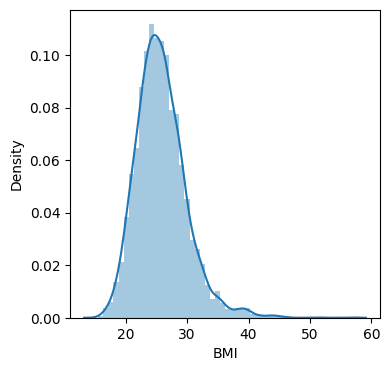

In [21]:
fig, ax = plt.subplots(figsize=(4,4))
sns.distplot(heartDisease_Dataset.BMI)

In [22]:
heartDisease_Dataset['BMI'].fillna(heartDisease_Dataset['BMI'].mean(),inplace=True)

In [23]:
heartDisease_Dataset.isnull().sum()

,0
gender,0
age,0
education,0
currentSmoker,0
cigsPerDay,0
BPMeds,0
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,0


<ipython-input-24-7b8e4bd587bb>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(heartDisease_Dataset.heartRate)


<Axes: xlabel='heartRate', ylabel='Density'>

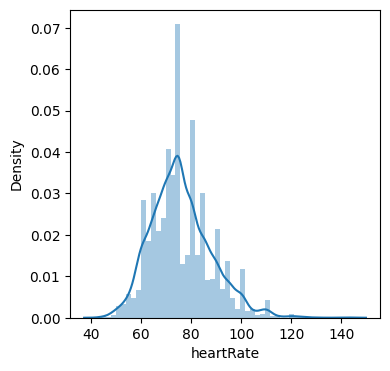

In [24]:
fig, ax = plt.subplots(figsize=(4,4))
sns.distplot(heartDisease_Dataset.heartRate)

In [25]:
heartDisease_Dataset['heartRate'].fillna(heartDisease_Dataset['heartRate'].mean(),inplace=True)

In [26]:
heartDisease_Dataset.isnull().sum()

,0
gender,0
age,0
education,0
currentSmoker,0
cigsPerDay,0
BPMeds,0
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,0


<ipython-input-27-e0a251b2d2b2>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(heartDisease_Dataset.glucose)


<Axes: xlabel='glucose', ylabel='Density'>

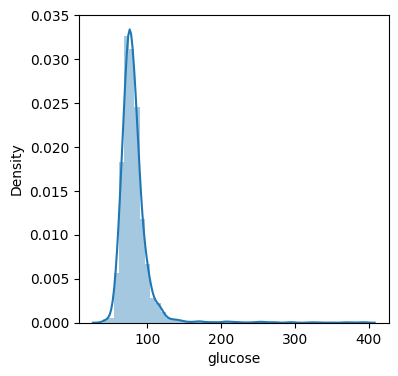

In [27]:
fig, ax = plt.subplots(figsize=(4,4))
sns.distplot(heartDisease_Dataset.glucose)

In [28]:
heartDisease_Dataset['glucose'].fillna(heartDisease_Dataset['glucose'].mean(),inplace=True)

In [29]:
heartDisease_Dataset.isnull().sum()

,0
gender,0
age,0
education,0
currentSmoker,0
cigsPerDay,0
BPMeds,0
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,0


Split the dataset into features(X) and target(Y)

In [30]:
# Splitting the dataset into featues(X) and target(y)
X1 = heartDisease_Dataset.drop(columns='HeartDisease')
y = heartDisease_Dataset['HeartDisease']

In [86]:
X1.head()

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0


In [90]:
# unscaled data

from sklearn.model_selection import train_test_split
# First split: 70% for training, 30% for testing + validation
X_train, X_rem, y_train, y_rem = train_test_split(X1, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size=0.5, random_state=42)

In [91]:
X_train

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
2010,0,42,1.0,1,9.0,0.0,0,1,0,274.0,135.0,90.0,22.19,70.0,81.966753
3340,0,64,1.0,0,0.0,1.0,0,1,0,285.0,160.0,87.0,29.97,65.0,87.000000
3591,0,39,2.0,0,0.0,0.0,0,0,0,205.0,104.0,74.0,20.55,68.0,81.966753
2742,1,40,1.0,1,20.0,0.0,0,0,0,228.0,131.0,80.0,26.77,64.0,74.000000
4034,0,40,2.0,1,20.0,0.0,0,0,0,213.0,130.0,80.0,19.98,96.0,76.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3444,0,36,1.0,1,5.0,0.0,0,1,0,222.0,147.0,94.0,26.79,76.0,71.000000
466,0,57,3.0,1,15.0,0.0,0,0,0,250.0,125.0,74.0,21.08,80.0,72.000000
3092,0,60,2.0,0,0.0,0.0,0,1,0,298.0,133.0,89.0,25.09,83.0,81.000000
3772,1,39,2.0,1,10.0,0.0,0,0,0,215.0,102.0,64.5,24.50,68.0,62.000000


In [92]:
a = X_train.shape
b = X_test.shape
c = X_val.shape
print(a)
print(b)
print(c)

(2966, 15)
(636, 15)
(636, 15)


In [93]:
print("First five elements in y_train are:\n", X_train[:5])
print("Type of y_train:",type(X_train))

First five elements in y_train are:
       gender  age  education  currentSmoker  cigsPerDay  BPMeds  \
2010       0   42        1.0              1         9.0     0.0   
3340       0   64        1.0              0         0.0     1.0   
3591       0   39        2.0              0         0.0     0.0   
2742       1   40        1.0              1        20.0     0.0   
4034       0   40        2.0              1        20.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
2010                0             1         0    274.0  135.0   90.0  22.19   
3340                0             1         0    285.0  160.0   87.0  29.97   
3591                0             0         0    205.0  104.0   74.0  20.55   
2742                0             0         0    228.0  131.0   80.0  26.77   
4034                0             0         0    213.0  130.0   80.0  19.98   

      heartRate    glucose  
2010       70.0  81.966753  
3340       65.0  87.000000 

In [94]:
#The sigmoid function is commonly used in logistic regression to map any real number to a value between 0 and 1, making it suitable for binary classification problems
def sigmoid(z):
  g = 1 / (1 + np.exp(-z))
  return g

#It computes the cost for logistic regression as we know the cost function is the differnce between predicted value and actual value so we need to minimize that
def computeCost(X, y, w, b, lambda_=1):

  m = X.shape[0]  # number of training examples
  z = np.dot(X, w) + b  # vectorized calculation of z
  g = sigmoid(z)  # apply the sigmoid function
  epsilon = 1e-15  # avoid log(0)
  g = np.clip(g, epsilon, 1 - epsilon)  # clip g to prevent log(0)

  # Vectorized cost function
  term_y = np.dot(y, np.log(g))
  term_not_y = np.dot((1 - y), np.log(1 - g))
  combined_terms = term_y + term_not_y
  total_cost = -(1 / m) * combined_terms

  return total_cost

# This funtion calculate the terms dj_dw and dj_db which are present in the gradient decendent function.
def compute_gradient(X, y, w, b, lambda_=None):
  m = X.shape[0]  # number of training examples

  z_wb = np.dot(X, w) + b  # vectorized calculation of z
  f_wb = sigmoid(z_wb)  # predictions for all training examples

  # Vectorized gradients
  error = f_wb - y  # error term

  # Compute the gradients
  dj_dw = (1/m) * np.dot(X.T, error)  # gradient with respect to w
  dj_db = (1/m) * np.sum(error)  # gradient with respect to b

  return dj_db, dj_dw

#function to calculate accuracy from scratch
def accuracy_function(X, y, w, b):
  z = np.dot(X, w) + b
  predictions = sigmoid(z)
  predicted_labels = (predictions >= 0.5).astype(int)
  correct_predictions = np.sum(predicted_labels == y)
  accuracy = correct_predictions / len(y) * 100
  return accuracy


# This gradient decendent function is used to calculate the best values for parameters w and b so that it fits the data well
def gradient_descent(X, y, X_val, y_val, w_in, b_in, cost_function, gradient_function, accuracy_function, alpha, num_iters, lambda_):

  train_losses = []
  val_losses = []
  train_accuracies = []
  val_accuracies = []

  for i in range(num_iters):
      # Calculate the gradient and update the parameters
      dj_db, dj_dw = gradient_function(X, y, w_in, b_in, lambda_)

      # Update Parameters using w, b, alpha and gradient
      w_in = w_in - alpha * dj_dw
      b_in = b_in - alpha * dj_db

      # Save cost J at each iteration
      train_loss = cost_function(X, y, w_in, b_in, lambda_)
      train_losses.append(train_loss)

      val_loss = cost_function(X_val, y_val, w_in, b_in, lambda_)
      val_losses.append(val_loss)

      # Calculate accuracy
      train_accuracy = accuracy_function(X, y, w_in, b_in)
      train_accuracies.append(train_accuracy)

      val_accuracy = accuracy_function(X_val, y_val, w_in, b_in)
      val_accuracies.append(val_accuracy)

      # Optionally, print the progress
      if i % (num_iters // 10) == 0 or i == (num_iters - 1):
          print(f"Iteration {i:4}: Training Cost {train_loss:.4f}, Validation Cost {val_loss:.4f}, "
                f"Training Accuracy {train_accuracy:.2f}%, Validation Accuracy {val_accuracy:.2f}%")

  return w_in, b_in, train_losses, val_losses, train_accuracies, val_accuracies

In [95]:
import random

# converting all inputs are NumPy arrays
X_train = X_train.to_numpy() if hasattr(X_train, 'to_numpy') else np.array(X_train)
y_train = y_train.to_numpy() if hasattr(y_train, 'to_numpy') else np.array(y_train)
X_val = X_val.to_numpy() if hasattr(X_val, 'to_numpy') else np.array(X_val)
y_val = y_val.to_numpy() if hasattr(y_val, 'to_numpy') else np.array(y_val)
X_test = X_test.to_numpy() if hasattr(X_test, 'to_numpy') else np.array(X_test)
y_test = y_test.to_numpy() if hasattr(y_test, 'to_numpy') else np.array(y_test)

#Print data types to confirm they are NumPy arrays
print(f"X_train type: {type(X_train)}, y_train type: {type(y_train)}")
print(f"X_val type: {type(X_val)}, y_val type: {type(y_val)}")
print(f"X_test type: {type(X_test)}, y_test type: {type(y_test)}")

# Initialize weights and bias
initial_w = np.random.randn(X_train.shape[1])
initial_b = np.random.randn()

# Set hyperparameters
iterations = 10000
alpha = 0.0001

# Run gradient descent
w, b, trainLoss, valLoss, trainAcc, valAcc = gradient_descent(
    X_train, y_train, X_val, y_val,
    initial_w, initial_b,
    computeCost, compute_gradient, accuracy_function,
    alpha, iterations, 0
)



X_train type: <class 'numpy.ndarray'>, y_train type: <class 'numpy.ndarray'>
X_val type: <class 'numpy.ndarray'>, y_val type: <class 'numpy.ndarray'>
X_test type: <class 'numpy.ndarray'>, y_test type: <class 'numpy.ndarray'>
Iteration    0: Training Cost 5.3101, Validation Cost 4.8876, Training Accuracy 84.63%, Validation Accuracy 85.85%


<ipython-input-94-3bcf37554bbd>:2: RuntimeWarning: overflow encountered in exp
  g = 1 / (1 + np.exp(-z))


Iteration 1000: Training Cost 3.4249, Validation Cost 3.5817, Training Accuracy 75.39%, Validation Accuracy 74.69%
Iteration 2000: Training Cost 2.5886, Validation Cost 2.6982, Training Accuracy 75.56%, Validation Accuracy 74.84%
Iteration 3000: Training Cost 1.8982, Validation Cost 1.9610, Training Accuracy 76.10%, Validation Accuracy 76.73%
Iteration 4000: Training Cost 1.3572, Validation Cost 1.4011, Training Accuracy 76.43%, Validation Accuracy 76.10%
Iteration 5000: Training Cost 0.9408, Validation Cost 0.9729, Training Accuracy 77.65%, Validation Accuracy 77.36%
Iteration 6000: Training Cost 0.6656, Validation Cost 0.6852, Training Accuracy 79.84%, Validation Accuracy 78.30%
Iteration 7000: Training Cost 0.5459, Validation Cost 0.5584, Training Accuracy 80.98%, Validation Accuracy 80.03%
Iteration 8000: Training Cost 0.5129, Validation Cost 0.5229, Training Accuracy 81.39%, Validation Accuracy 81.76%
Iteration 9000: Training Cost 0.5033, Validation Cost 0.5116, Training Accuracy 

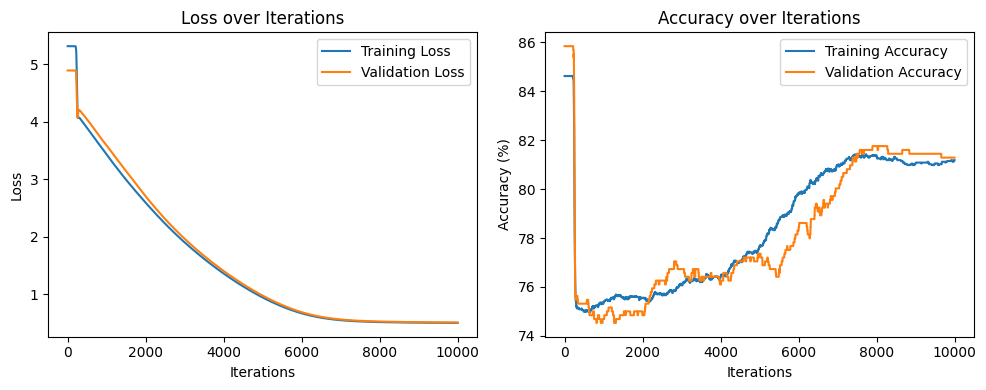

In [96]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(trainLoss, label="Training Loss")
plt.plot(valLoss, label="Validation Loss")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Loss over Iterations")
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(trainAcc, label="Training Accuracy")
plt.plot(valAcc, label="Validation Accuracy")
plt.xlabel("Iterations")
plt.ylabel("Accuracy (%)")
plt.title("Accuracy over Iterations")
plt.legend()

plt.tight_layout()
plt.show()

In [97]:
# Min-Max scaling

 # """
  # Perform Min-Max scaling on the dataset X with optional clipping and epsilon to handle outliers and zero ranges.

  # Parameters:
  # X (numpy array): Feature matrix of shape (n_samples, n_features).
  # lower_percentile (int): Lower bound percentile for clipping (default is 5).
  # upper_percentile (int): Upper bound percentile for clipping (default is 95).
  # epsilon (float): Small value to avoid division by zero (default is 1e-8).

  # Returns:
  # X_scaled (numpy array): Min-max scaled version of X with clipping applied.
  # """

import numpy as np

def min_max_scaling(X, lower_percentile=5, upper_percentile=95, epsilon=1e-8):

  # Calculate the percentiles for clipping to mitigate the effect of outliers
  X_min = np.percentile(X, lower_percentile, axis=0)  # Clip lower values
  X_max = np.percentile(X, upper_percentile, axis=0)  # Clip upper values

  # Clip values to avoid extreme outliers
  X_clipped = np.clip(X, X_min, X_max)

  # Apply Min-Max scaling after clipping, with epsilon to prevent division by zero
  X_scaled = (X_clipped - X_min) / (X_max - X_min + epsilon)

  print(X_max-X_min)

  return X_scaled


In [98]:
#scaled data
X_sc = min_max_scaling(X1)

[  1.      27.       3.       1.      30.       0.       0.       1.
   0.     142.      71.      38.575   12.7115  38.      45.    ]


In [99]:
from sklearn.model_selection import train_test_split

# First split: 70% for training, 30% for testing + validation
X_sc_train, X_sc_rem, y_sc_train, y_sc_rem = train_test_split(X_sc, y, test_size=0.3, random_state=42)
X_sc_val, X_sc_test, y_sc_val, y_sc_test = train_test_split(X_sc_rem, y_sc_rem, test_size=0.5, random_state=42)

In [100]:
X_sc_train

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
2010,0.0,0.185185,0.000000,1.0,0.300000,0.0,0.0,1.0,0.0,0.732394,0.436620,0.622165,0.167565,0.263158,0.443706
3340,0.0,1.000000,0.000000,0.0,0.000000,0.0,0.0,1.0,0.0,0.809859,0.788732,0.544394,0.779609,0.131579,0.555556
3591,0.0,0.074074,0.333333,0.0,0.000000,0.0,0.0,0.0,0.0,0.246479,0.000000,0.207388,0.038548,0.210526,0.443706
2742,1.0,0.111111,0.000000,1.0,0.666667,0.0,0.0,0.0,0.0,0.408451,0.380282,0.362929,0.527868,0.105263,0.266667
4034,0.0,0.111111,0.333333,1.0,0.666667,0.0,0.0,0.0,0.0,0.302817,0.366197,0.362929,0.000000,0.947368,0.311111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3444,0.0,0.000000,0.000000,1.0,0.166667,0.0,0.0,1.0,0.0,0.366197,0.605634,0.725859,0.529442,0.421053,0.200000
466,0.0,0.740741,0.666667,1.0,0.500000,0.0,0.0,0.0,0.0,0.563380,0.295775,0.207388,0.080242,0.526316,0.222222
3092,0.0,0.851852,0.333333,0.0,0.000000,0.0,0.0,1.0,0.0,0.901408,0.408451,0.596241,0.395705,0.605263,0.422222
3772,1.0,0.074074,0.333333,1.0,0.333333,0.0,0.0,0.0,0.0,0.316901,0.000000,0.000000,0.349290,0.210526,0.000000


In [101]:
# Convert the data to NumPy arrays if they are still Pandas DataFrames
X_nosc_train = X_train.to_numpy() if isinstance(X_train, pd.DataFrame) else X_train
y_nosc_train = y_train.to_numpy() if isinstance(y_train, (pd.DataFrame, pd.Series)) else y_train
X_nosc_val = X_val.to_numpy() if isinstance(X_val, pd.DataFrame) else X_val
y_nosc_val = y_val.to_numpy() if isinstance(y_val, (pd.DataFrame, pd.Series)) else y_val

X_sc_train = X_sc_train.to_numpy() if isinstance(X_sc_train, pd.DataFrame) else X_sc_train
y_sc_train = y_sc_train.to_numpy() if isinstance(y_sc_train, (pd.DataFrame, pd.Series)) else y_sc_train
X_sc_val = X_sc_val.to_numpy() if isinstance(X_sc_val, pd.DataFrame) else X_sc_val
y_sc_val = y_sc_val.to_numpy() if isinstance(y_sc_val, (pd.DataFrame, pd.Series)) else y_sc_val

# Hyperparameters
alpha = 0.00015  # Learning rate
num_iters = 20000  # Number of iterations
# w_init = np.zeros(X_nosc_train.shape[1])  # Initialize weights based on input shape
# b_init = 0  # Initialize bias

w_init = np.random.randn(X_train.shape[1])
b_init = np.random.randn()

# Train the model without scaling
w_no_scaling, b_no_scaling, train_loss_no_scaling, val_loss_no_scaling, train_acc_no_scaling, val_acc_no_scaling = gradient_descent(
    X_nosc_train, y_nosc_train, X_nosc_val, y_nosc_val, w_init, b_init, computeCost, compute_gradient, accuracy_function, alpha, num_iters, lambda_=0)

# Train the model with Min-Max scaling
w_scaled, b_scaled, train_loss_scaled, val_loss_scaled, train_acc_scaled, val_acc_scaled = gradient_descent(
    X_sc_train, y_sc_train, X_sc_val, y_sc_val, w_init, b_init, computeCost, compute_gradient, accuracy_function, alpha, num_iters, lambda_=0)


Iteration    0: Training Cost 29.2294, Validation Cost 29.5799, Training Accuracy 15.37%, Validation Accuracy 14.31%


<ipython-input-94-3bcf37554bbd>:2: RuntimeWarning: overflow encountered in exp
  g = 1 / (1 + np.exp(-z))


Iteration 2000: Training Cost 4.6368, Validation Cost 4.7668, Training Accuracy 74.68%, Validation Accuracy 75.00%
Iteration 4000: Training Cost 2.7458, Validation Cost 2.6943, Training Accuracy 75.02%, Validation Accuracy 75.47%
Iteration 6000: Training Cost 0.8988, Validation Cost 0.8825, Training Accuracy 78.25%, Validation Accuracy 77.67%
Iteration 8000: Training Cost 0.6121, Validation Cost 0.5942, Training Accuracy 80.55%, Validation Accuracy 80.66%
Iteration 10000: Training Cost 0.5375, Validation Cost 0.5266, Training Accuracy 81.36%, Validation Accuracy 80.97%
Iteration 12000: Training Cost 0.4970, Validation Cost 0.4896, Training Accuracy 82.06%, Validation Accuracy 82.23%
Iteration 14000: Training Cost 0.4725, Validation Cost 0.4667, Training Accuracy 82.91%, Validation Accuracy 81.92%
Iteration 16000: Training Cost 0.4585, Validation Cost 0.4531, Training Accuracy 83.04%, Validation Accuracy 82.39%
Iteration 18000: Training Cost 0.4508, Validation Cost 0.4451, Training Accu

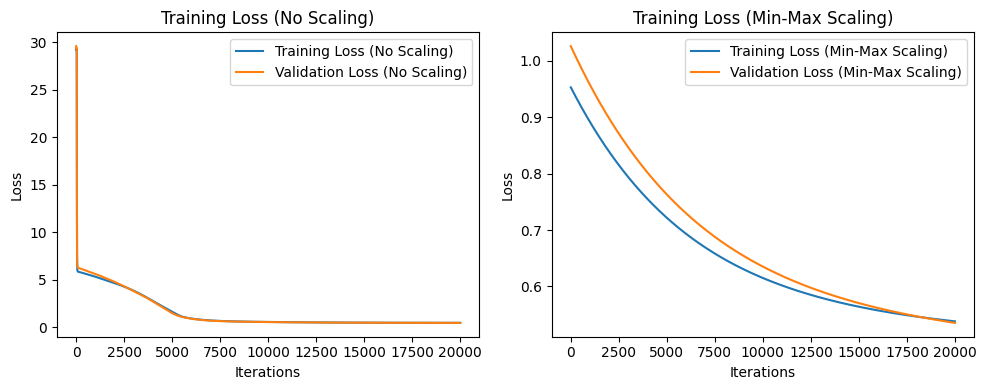

In [102]:
import matplotlib.pyplot as plt

# Create a figure with two subplots (1 row, 2 columns)
plt.figure(figsize=(10, 4))

# First subplot for 'Training Loss (No Scaling)'
plt.subplot(1, 2, 1)  # First subplot
plt.plot(train_loss_no_scaling, label='Training Loss (No Scaling)')
plt.plot(val_loss_no_scaling, label="Validation Loss (No Scaling)")
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Training Loss (No Scaling)')
plt.legend()

# Second subplot for 'Training Loss (Min-Max Scaling)'
plt.subplot(1, 2, 2)  # Second subplot
plt.plot(train_loss_scaled, label='Training Loss (Min-Max Scaling)')
plt.plot(val_loss_scaled, label="Validation Loss (Min-Max Scaling)")
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Training Loss (Min-Max Scaling)')
plt.legend()

# Show the figure with both subplots
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

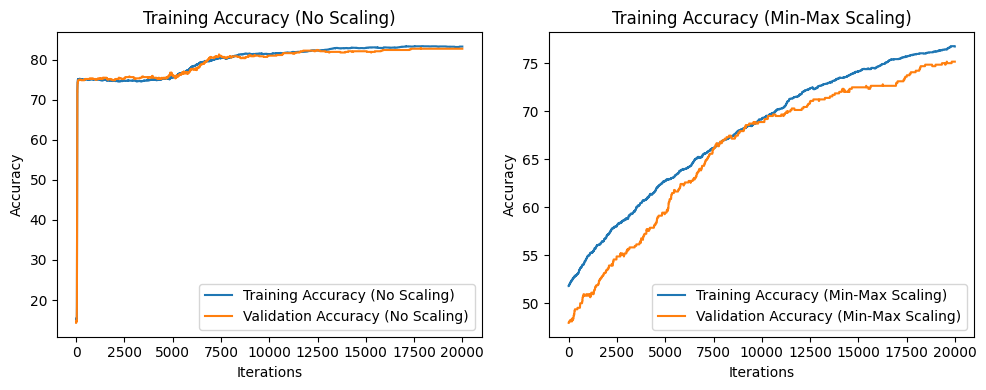

In [103]:
import matplotlib.pyplot as plt

# Create a figure with two subplots (1 row, 2 columns)
plt.figure(figsize=(10, 4))

# First subplot for 'Training Accuracy (No Scaling)'
plt.subplot(1, 2, 1)  # First subplot
plt.plot(train_acc_no_scaling, label='Training Accuracy (No Scaling)')
plt.plot(val_acc_no_scaling, label='Validation Accuracy (No Scaling)')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Training Accuracy (No Scaling)')
plt.legend()

# Second subplot for 'Training Accuracy (Min-Max Scaling)'
plt.subplot(1, 2, 2)  # Second subplot
plt.plot(train_acc_scaled, label='Training Accuracy (Min-Max Scaling)')
plt.plot(val_acc_scaled, label='Validation Accuracy (Min-Max Scaling)')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Training Accuracy (Min-Max Scaling)')
plt.legend()

# Show the figure with both subplots
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


CONFUSION MATRIX

In [104]:
#in this we use the w and b which we calculated above
def predict(X, w, b):
  z = np.dot(X, w) + b
  return sigmoid(z)

In [105]:
val_predict = predict(X_sc_val, w, b)
y_val_pred_labels = (val_predict >= 0.7).astype(int)

In [106]:
import matplotlib.pyplot as plt

def plot_confusion_matrix(conf_matrix):
  plt.figure(figsize=(6, 4))
  plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.get_cmap('Blues'))
  plt.title('Confusion Matrix')
  plt.colorbar()

  classes = ['No heart disease', 'heart disease']

  plt.xticks([0, 1], classes)
  plt.yticks([0, 1], classes)

  for i in range(2):
      for j in range(2):
          color = 'green' if i == j else 'red'
          plt.text(j, i, str(conf_matrix[i, j]), horizontalalignment="center", color=color)

  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.tight_layout()
  plt.show()


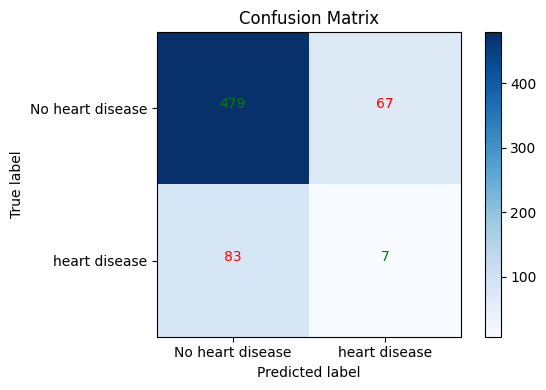

Accuracy: 0.76
Precision: 0.09
Recall: 0.08
F1 Score: 0.09


In [107]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.metrics import classification_report

accuracy = accuracy_score(y_val, y_val_pred_labels)
precision = precision_score(y_val, y_val_pred_labels)
recall = recall_score(y_val, y_val_pred_labels)
f1 = f1_score(y_val, y_val_pred_labels)
# roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
conf_matrix = confusion_matrix(y_val, y_val_pred_labels)
plot_confusion_matrix(conf_matrix)
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

In [108]:
val_predict1 = predict(X_val, w, b)
y_val_pred_labels1 = (val_predict1 >= 0.5).astype(int)

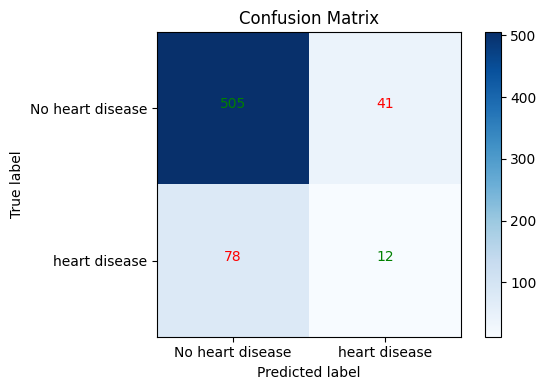

Accuracy: 0.81
Precision: 0.23
Recall: 0.13
F1 Score: 0.17


In [109]:
accuracy = accuracy_score(y_val, y_val_pred_labels1)
precision = precision_score(y_val, y_val_pred_labels1)
recall = recall_score(y_val, y_val_pred_labels1)
f1 = f1_score(y_val, y_val_pred_labels1)
# roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
conf_matrix = confusion_matrix(y_val, y_val_pred_labels1)
plot_confusion_matrix(conf_matrix)
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

TYPES OF GRADIENT DECENDENT

Batch gradient decendent where we split our data into batches and compute gradient.

In [110]:
from sklearn.metrics import accuracy_score

def mini_batch_gradient_descent(X, y_true, epochs, batch_size, gradient_function, cost_function, predict_function, learning_rate=0.01, early_stopping_threshold=1e-5):
  # Convert to numpy if necessary
  if isinstance(X, pd.DataFrame) or isinstance(X, pd.Series):
      X = X.to_numpy()
  if isinstance(y_true, pd.DataFrame) or isinstance(y_true, pd.Series):
      y_true = y_true.to_numpy()

  number_of_features = X.shape[1]
  w = np.ones(shape=(number_of_features))
  b = 0
  total_samples = X.shape[0]

  cost_list = []
  accuracy_list = []
  epoch_list = []
  prev_cost = float('inf')  # Initialize previous cost to infinity

  for i in range(epochs):
      indices = np.random.permutation(total_samples)  # Shuffle the data
      X_shuffled = X[indices]
      y_shuffled = y_true[indices]

      # Divide data into mini-batches
      for j in range(0, total_samples, batch_size):
          X_mini_batch = X_shuffled[j:j + batch_size]
          y_mini_batch = y_shuffled[j:j + batch_size]

          # Gradients (now only for the mini-batch)
          b_grad, w_grad = gradient_function(X_mini_batch, y_mini_batch, w, b, lambda_=1)

          # Update parameters
          w = w - learning_rate * w_grad
          b = b - learning_rate * b_grad

      # Calculate cost and accuracy for the entire dataset every n epochs
      if i % 100 == 0:
          cost = cost_function(X, y_true, w, b, lambda_=1)
          cost_list.append(cost)

          # Calculate predictions for accuracy using sklearn's accuracy_score
          y_pred = predict_function(X, w, b)
          y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary 0/1 predictions
          accuracy = accuracy_score(y_true, y_pred_binary)
          accuracy_list.append(accuracy)

          epoch_list.append(i)
          print(f"Epoch {i}: Cost {cost}, Accuracy {accuracy * 100:.2f}%")

          # Early stopping condition
          # if abs(prev_cost - cost) < early_stopping_threshold:
          #     print(f"Early stopping at epoch {i} with cost {cost} and accuracy {accuracy * 100:.2f}%")
          #     break
          # prev_cost = cost

  return w, b, prev_cost, cost_list, accuracy_list, epoch_list


Epoch 0: Cost 0.4089967498335116, Accuracy 84.80%
Epoch 100: Cost 0.3824201375783384, Accuracy 85.23%
Epoch 200: Cost 0.38256155383920415, Accuracy 85.16%
Epoch 300: Cost 0.3821272458197748, Accuracy 85.25%
Epoch 400: Cost 0.3821387891426495, Accuracy 85.25%
Epoch 500: Cost 0.3822606404319462, Accuracy 85.23%
Epoch 600: Cost 0.3821314466418709, Accuracy 85.28%
Epoch 700: Cost 0.38223677130282574, Accuracy 85.23%
Epoch 800: Cost 0.3822247696637891, Accuracy 85.23%
Epoch 900: Cost 0.38220210937115023, Accuracy 85.16%


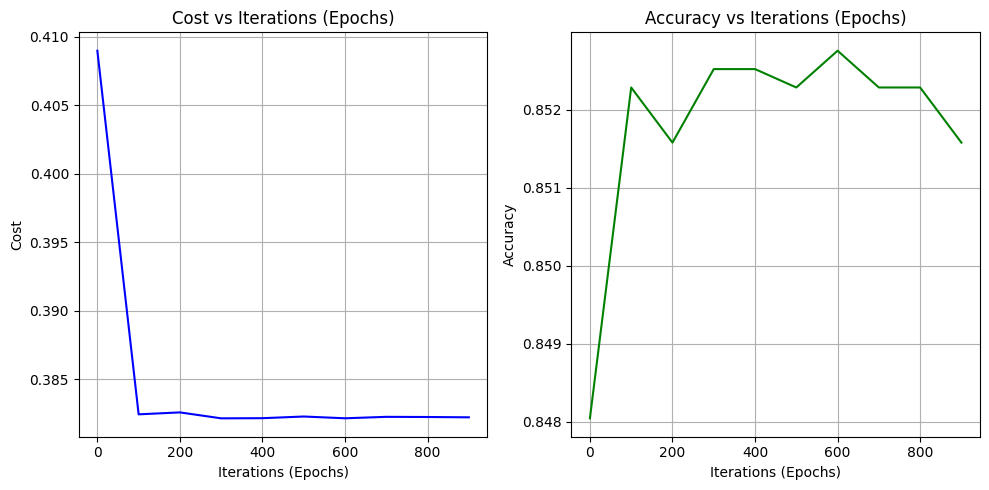

In [111]:
epochs = 1000
batch_size = 5
learning_rate = 0.01

w, b, final_cost, cost_list, accuracy_list, epoch_list = mini_batch_gradient_descent(X_sc, y, epochs, batch_size, compute_gradient, computeCost, predict, learning_rate)

# Plot cost
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st plot
plt.plot(epoch_list, cost_list, 'b-')
plt.xlabel('Iterations (Epochs)')
plt.ylabel('Cost')
plt.title('Cost vs Iterations (Epochs)')
plt.grid(True)

# Plot accuracy
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd plot
plt.plot(epoch_list, accuracy_list, 'g-')
plt.xlabel('Iterations (Epochs)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Iterations (Epochs)')
plt.grid(True)

# Show both plots
plt.tight_layout()
plt.show()

in stochastic we take random samples and then calculate the gradient decendent according to that

In [112]:
from sklearn.metrics import accuracy_score
import random

def stochastic_gradient_descent(X, y_true, epochs, learning_rate, predict_function):
  # Convert to numpy if necessary
  if isinstance(X, pd.DataFrame) or isinstance(X, pd.Series):
      X = X.to_numpy()
  if isinstance(y_true, pd.DataFrame) or isinstance(y_true, pd.Series):
      y_true = y_true.to_numpy()

  number_of_features = X.shape[1]
  w = np.random.randn(number_of_features)  # Initialize weights randomly
  b = 0
  total_samples = X.shape[0]

  cost_list = []
  accuracy_list = []
  epoch_list = []

  for i in range(epochs):
      random_index = random.randint(0, total_samples - 1)  # random index from total samples
      sample_x = X[random_index]
      sample_y = y_true[random_index]

      y_predicted = np.dot(w, sample_x.T) + b

      # Gradient calculation
      w_grad = -(2) * (sample_x.T.dot(sample_y - y_predicted))
      b_grad = -(2) * (sample_y - y_predicted)

      # Update weights and bias
      w = w - learning_rate * w_grad
      b = b - learning_rate * b_grad

      # Compute cost
      cost = np.square(sample_y - y_predicted)

      # Record cost and accuracy every 100 iterations
      if i % 100 == 0:
          cost_list.append(cost)
          epoch_list.append(i)

          # Predict for the entire dataset and calculate accuracy
          y_pred = predict_function(X, w, b)
          y_pred_binary = (y_pred > 0.5).astype(int)  # Binary classification
          accuracy = accuracy_score(y_true, y_pred_binary)
          accuracy_list.append(accuracy)

          print(f"Epoch {i}: Cost {cost}, Accuracy {accuracy * 100:.2f}%")

  return w, b, cost, cost_list, accuracy_list, epoch_list


Epoch 0: Cost 16.628346574455428, Accuracy 60.78%
Epoch 100: Cost 0.29407391743723355, Accuracy 55.45%
Epoch 200: Cost 3.996729868054397, Accuracy 51.30%
Epoch 300: Cost 0.05295794563350674, Accuracy 47.17%
Epoch 400: Cost 0.24894828483073095, Accuracy 43.77%
Epoch 500: Cost 0.861150957291493, Accuracy 40.70%
Epoch 600: Cost 0.3470736782098715, Accuracy 40.73%
Epoch 700: Cost 0.7489396063000076, Accuracy 42.45%
Epoch 800: Cost 0.2066347221370099, Accuracy 41.88%
Epoch 900: Cost 2.385148035960649, Accuracy 41.53%


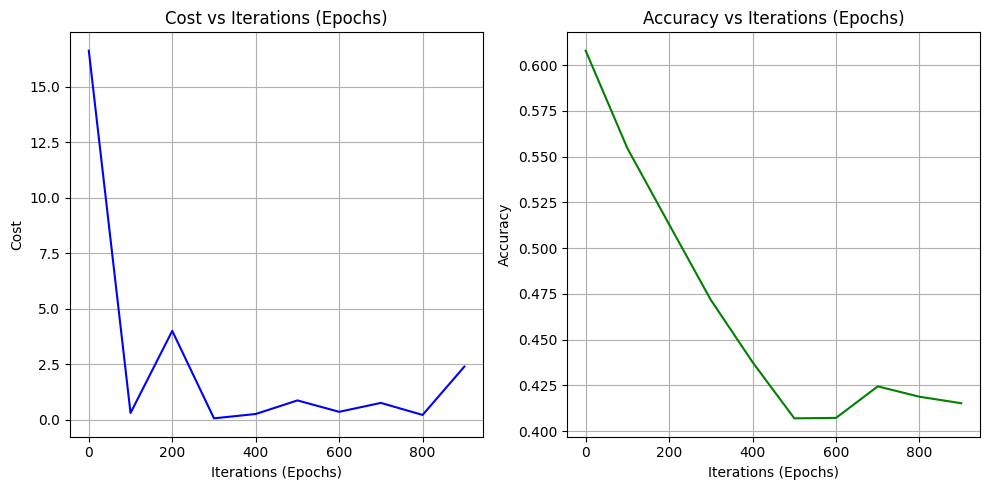

In [113]:
epochs = 1000
# batch_size = 5
learning_rate = 0.001

# Call stochastic gradient descent function
w, b, final_cost, cost_list, accuracy_list, epoch_list = stochastic_gradient_descent(X_sc, y, epochs, learning_rate, predict)

# Plot cost
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st plot
plt.plot(epoch_list, cost_list, 'b-')
plt.xlabel('Iterations (Epochs)')
plt.ylabel('Cost')
plt.title('Cost vs Iterations (Epochs)')
plt.grid(True)

# Plot accuracy
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd plot
plt.plot(epoch_list, accuracy_list, 'g-')
plt.xlabel('Iterations (Epochs)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Iterations (Epochs)')
plt.grid(True)

# Show both plots
plt.tight_layout()
plt.show()


K-FOLDS

We are implementing k folds so that it give us the correct accuracy of the model. so that it is not overfit or underfit accuracy

In [114]:
def gradient_descent_for_Kfolds(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters, lambda_):

  # number of training examples
  m = len(X)

  # An array to store cost J and w's at each iteration primarily for graphing later
  J_history = []
  w_history = []

  for i in range(num_iters):
      # Calculate the gradient and update the parameters
      dj_db, dj_dw = gradient_function(X, y, w_in, b_in, lambda_)

      # Update Parameters using w, b, alpha and gradient
      w_in = w_in - alpha * dj_dw
      b_in = b_in - alpha * dj_db

      # Save cost J at each iteration
      cost = cost_function(X, y, w_in, b_in, lambda_)
      J_history.append(cost)

      # Print cost every at intervals 10 times or as many iterations if < 10
      if i % (num_iters // 10) == 0 or i == (num_iters - 1):
          w_history.append(w_in)
          print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}")

  return w_in, b_in, J_history, w_history  # Return updated w, b, and histories


def kfold_indices(data, k):
  fold_size = len(data) // k
  indices = np.arange(len(data))
  folds = []
  for i in range(k):
      test_indices = indices[i * fold_size: (i + 1) * fold_size]
      train_indices = np.concatenate([indices[:i * fold_size], indices[(i + 1) * fold_size:]])
      folds.append((train_indices, test_indices))
  return folds


# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_sc = scaler.fit_transform(X1)

fold_indices = kfold_indices(X_sc, 5)

import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy_list = []
precision_list = []
recall_list = []
f1_list = []

# Ensure X_sc and y are NumPy arrays
X_sc = X_sc.to_numpy() if isinstance(X_sc, pd.DataFrame) else X_sc
y = y.to_numpy() if isinstance(y, (pd.DataFrame, pd.Series)) else y

for train_indices, test_indices in fold_indices:
  w_flds = np.ones(shape=(X_sc.shape[1]))  # Initialize weights with ones
  b_flds = 0
  learning_rate = 0.01
  num_iters = 10000

  # Use indices to split the data for training and testing
  X_train, y_train = X_sc[train_indices], y[train_indices]
  X_test, y_test = X_sc[test_indices], y[test_indices]

  # Call gradient descent function
  w_fld, b_fld, J_history, w_history = gradient_descent_for_Kfolds(X_train, y_train, w_flds, b_flds, computeCost, compute_gradient, learning_rate, num_iters, lambda_=0)

  # Predict using the learned weights and bias
  y_pred = predict(X_test, w_fld, b_fld)  # Use updated w_fld and b_fld

  # Convert predictions to binary labels (threshold at 0.5)
  y_pred_labels = (y_pred >= 0.5).astype(int)

  # Calculate performance metrics
  accuracy = accuracy_score(y_test, y_pred_labels)
  precision = precision_score(y_test, y_pred_labels)
  recall = recall_score(y_test, y_pred_labels)
  f1 = f1_score(y_test, y_pred_labels)

  # Append results to respective lists
  accuracy_list.append(accuracy)
  precision_list.append(precision)
  recall_list.append(recall)
  f1_list.append(f1)

# Calculate averages and standard deviations for metrics
accuracy_avg, accuracy_std = np.mean(accuracy_list), np.std(accuracy_list)
precision_avg, precision_std = np.mean(precision_list), np.std(precision_list)
recall_avg, recall_std = np.mean(recall_list), np.std(recall_list)
f1_avg, f1_std = np.mean(f1_list), np.std(f1_list)

# Print results
print("\nCross-validation results (average ± std):")
print(f"Accuracy: {accuracy_avg:.4f} ± {accuracy_std:.4f}")
print(f"Precision: {precision_avg:.4f} ± {precision_std:.4f}")
print(f"Recall: {recall_avg:.4f} ± {recall_std:.4f}")
print(f"F1 Score: {f1_avg:.4f} ± {f1_std:.4f}")


Iteration    0: Cost     4.01
Iteration 1000: Cost     0.40
Iteration 2000: Cost     0.40
Iteration 3000: Cost     0.39
Iteration 4000: Cost     0.39
Iteration 5000: Cost     0.39
Iteration 6000: Cost     0.38
Iteration 7000: Cost     0.38
Iteration 8000: Cost     0.38
Iteration 9000: Cost     0.38
Iteration 9999: Cost     0.38
Iteration    0: Cost     3.97


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Iteration 1000: Cost     0.41
Iteration 2000: Cost     0.41
Iteration 3000: Cost     0.40
Iteration 4000: Cost     0.40
Iteration 5000: Cost     0.40
Iteration 6000: Cost     0.40
Iteration 7000: Cost     0.40
Iteration 8000: Cost     0.39
Iteration 9000: Cost     0.39
Iteration 9999: Cost     0.39
Iteration    0: Cost     3.98
Iteration 1000: Cost     0.41
Iteration 2000: Cost     0.40
Iteration 3000: Cost     0.40
Iteration 4000: Cost     0.39
Iteration 5000: Cost     0.39
Iteration 6000: Cost     0.39
Iteration 7000: Cost     0.39
Iteration 8000: Cost     0.39
Iteration 9000: Cost     0.39
Iteration 9999: Cost     0.39
Iteration    0: Cost     3.98


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Iteration 1000: Cost     0.41
Iteration 2000: Cost     0.40
Iteration 3000: Cost     0.40
Iteration 4000: Cost     0.40
Iteration 5000: Cost     0.40
Iteration 6000: Cost     0.39
Iteration 7000: Cost     0.39
Iteration 8000: Cost     0.39
Iteration 9000: Cost     0.39
Iteration 9999: Cost     0.39
Iteration    0: Cost     3.96
Iteration 1000: Cost     0.41
Iteration 2000: Cost     0.40
Iteration 3000: Cost     0.40
Iteration 4000: Cost     0.40
Iteration 5000: Cost     0.39
Iteration 6000: Cost     0.39
Iteration 7000: Cost     0.39
Iteration 8000: Cost     0.39
Iteration 9000: Cost     0.39
Iteration 9999: Cost     0.39

Cross-validation results (average ± std):
Accuracy: 0.8484 ± 0.0101
Precision: 0.4000 ± 0.4899
Recall: 0.0033 ± 0.0040
F1 Score: 0.0065 ± 0.0080


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Regularization and early stopping

In [ ]:
def compute_gradient(X, y, w, b, lambda_, regularization='l2'):
  m = X.shape[0]  # Number of training examples
  predictions = sigmoid(np.dot(X, w) + b)

  # Compute gradients for weights and bias
  error = predictions - y
  dj_db = np.sum(error) / m
  dj_dw = np.dot(X.T, error) / m

  # Add regularization to gradients
  if regularization == 'l2':
      dj_dw += (lambda_ / m) * w
  elif regularization == 'l1':
      dj_dw += (lambda_ / m) * np.sign(w)

  return dj_db, dj_dw

In [ ]:
def compute_cost_with_regularization(X, y, w, b, lambda_, regularization='l2'):
  m = X.shape[0]  # Number of training examples

  # Compute the predictions
  z = np.dot(X, w) + b
  predictions = sigmoid(z)

  # Compute the logistic regression cost
  cost = -np.mean(y * np.log(predictions + 1e-15) + (1 - y) * np.log(1 - predictions + 1e-15))

  # Add regularization term (L1 or L2)
  if regularization == 'l2':
      reg_cost = (lambda_ / (2 * m)) * np.sum(np.square(w))  # L2 regularization
  elif regularization == 'l1':
      reg_cost = (lambda_ / m) * np.sum(np.abs(w))  # L1 regularization

  total_cost = cost + reg_cost
  return total_cost

Iteration 0: Training Loss 3.9956, Validation Loss 4.0047
Iteration 1000: Training Loss 0.4115, Validation Loss 0.3942
Iteration 2000: Training Loss 0.4060, Validation Loss 0.3865
Early stopping at iteration 2508 due to no improvement in validation loss.
Iteration 0: Training Loss 0.4040, Validation Loss 0.3838
Iteration 1000: Training Loss 0.4009, Validation Loss 0.3795
Iteration 2000: Training Loss 0.3986, Validation Loss 0.3762
Iteration 3000: Training Loss 0.3968, Validation Loss 0.3736
Iteration 4000: Training Loss 0.3953, Validation Loss 0.3715
Iteration 5000: Training Loss 0.3942, Validation Loss 0.3698
Iteration 6000: Training Loss 0.3932, Validation Loss 0.3684
Iteration 7000: Training Loss 0.3924, Validation Loss 0.3672
Iteration 8000: Training Loss 0.3917, Validation Loss 0.3662
Iteration 9000: Training Loss 0.3911, Validation Loss 0.3653
Iteration 10000: Training Loss 0.3906, Validation Loss 0.3645
Iteration 11000: Training Loss 0.3901, Validation Loss 0.3639
Iteration 1200

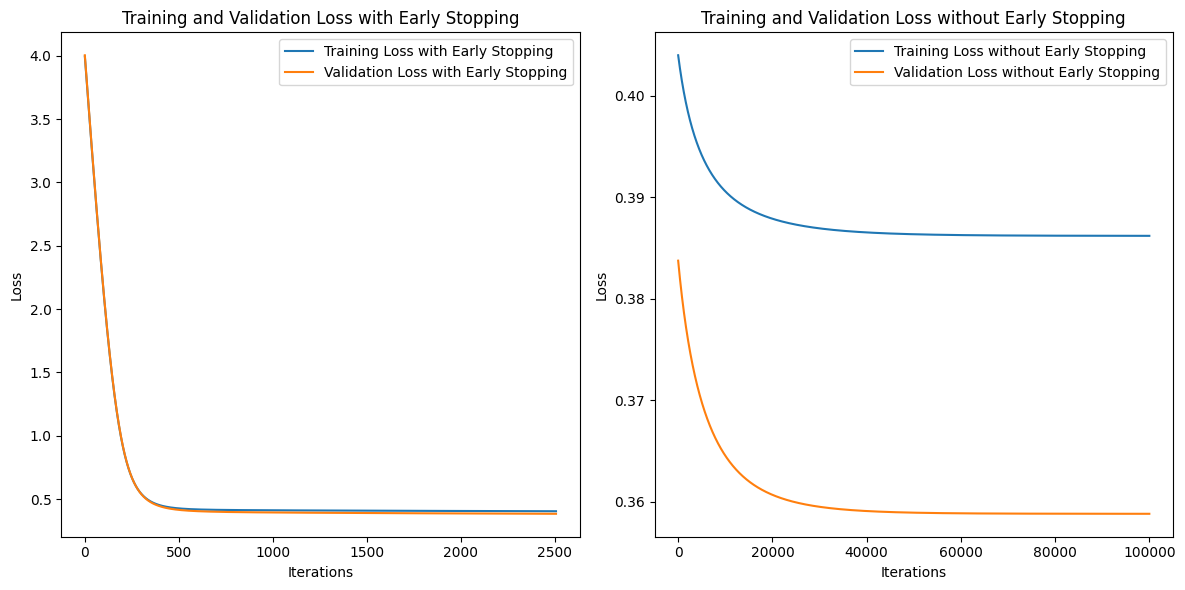

In [125]:
import numpy as np
import matplotlib.pyplot as plt

def gradient_descent_with_early_stopping(X, y, X_val, y_val, w, b, learning_rate, num_iters, lambda_=0, patience=10, tolerance=1e-4, regularization='l2'):
    m = len(y)
    train_losses = []
    val_losses = []
    min_val_loss = float('inf')  # Initialize minimum validation loss to infinity
    patience_counter = 0  # Initialize patience counter to 0

    for i in range(num_iters):
        # Calculate gradients
        dj_db, dj_dw = compute_gradient(X, y, w, b, lambda_, regularization)

        # Update weights
        w = w - learning_rate * dj_dw
        b = b - learning_rate * dj_db

        # Compute training and validation cost
        train_loss = compute_cost_with_regularization(X, y, w, b, lambda_, regularization)
        val_loss = compute_cost_with_regularization(X_val, y_val, w, b, lambda_, regularization)

        train_losses.append(train_loss)
        val_losses.append(val_loss)

        # Early stopping logic with tolerance
        if min_val_loss - val_loss > tolerance:
            min_val_loss = val_loss  # Update minimum validation loss
            patience_counter = 0  # Reset patience counter
        else:
            patience_counter += 1  # Increment patience counter if no improvement

        # If patience is exceeded, stop training early
        if patience_counter >= patience:
            print(f"Early stopping at iteration {i} due to no improvement in validation loss.")
            break

        # Print progress at intervals or the last iteration
        if i % 1000 == 0 or i == num_iters - 1:
            print(f"Iteration {i}: Training Loss {train_loss:.4f}, Validation Loss {val_loss:.4f}")

    return w, b, train_losses, val_losses



# Example usage
w = np.ones(X_sc_train.shape[1])
b = 0
learning_rate = 0.01
num_iters = 100000
lambda_ = 0.01  # Regularization strength
patience = 20  # Early stopping patience

# Call the function
w, b, train_losses, val_losses = gradient_descent_with_early_stopping(
    X_sc_train, y_sc_train, X_sc_val, y_sc_val, w, b, learning_rate, num_iters, lambda_, patience, regularization='l2'
)

# For comparison, run without early stopping
w_no_es, b_no_es, train_losses_no_es, val_losses_no_es = gradient_descent_with_early_stopping(
    X_sc_train, y_sc_train, X_sc_val, y_sc_val, w, b, learning_rate, num_iters, lambda_, patience=100000, regularization='l2'
)

# Plot the results
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss with Early Stopping')
plt.plot(val_losses, label='Validation Loss with Early Stopping')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss with Early Stopping')

plt.subplot(1, 2, 2)
plt.plot(train_losses_no_es, label='Training Loss without Early Stopping')
plt.plot(val_losses_no_es, label='Validation Loss without Early Stopping')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss without Early Stopping')

plt.tight_layout()
plt.show()
